<a href="https://colab.research.google.com/github/walkerjian/Physics/blob/main/SpiderDiffraction3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

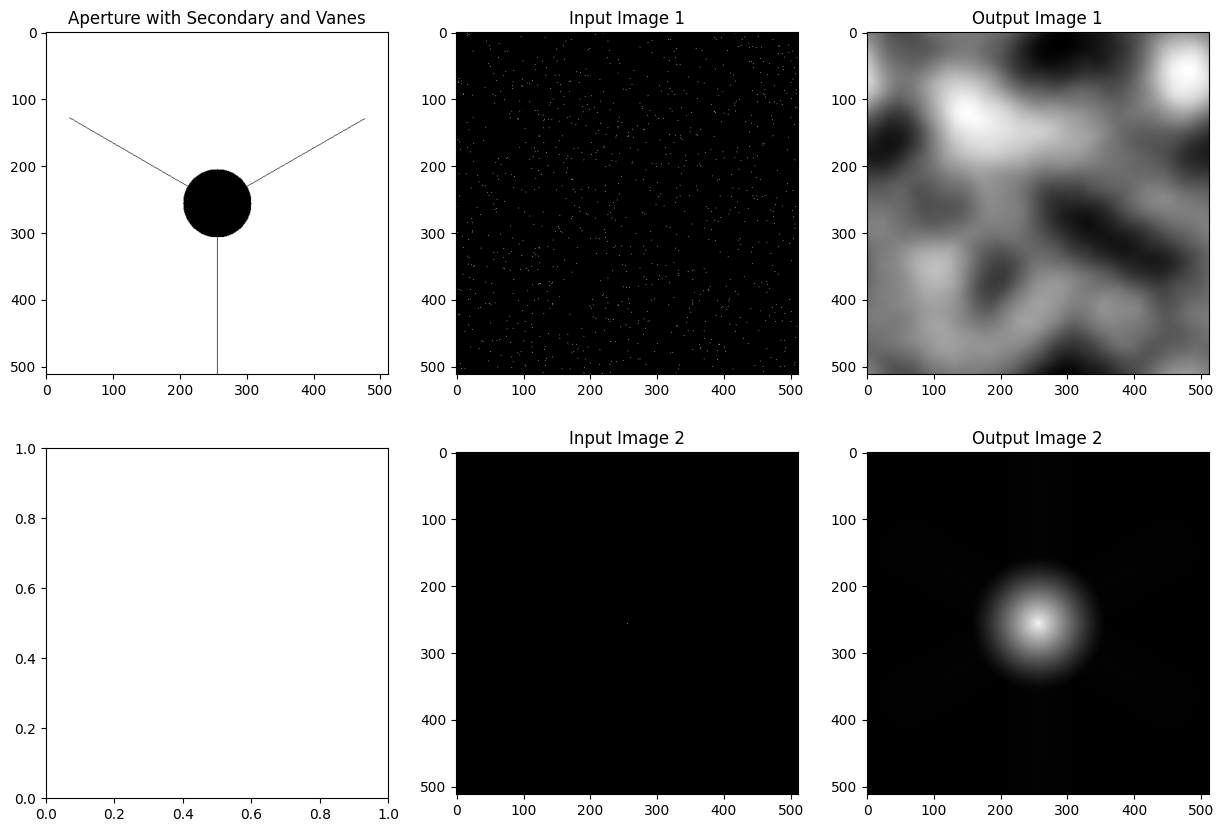

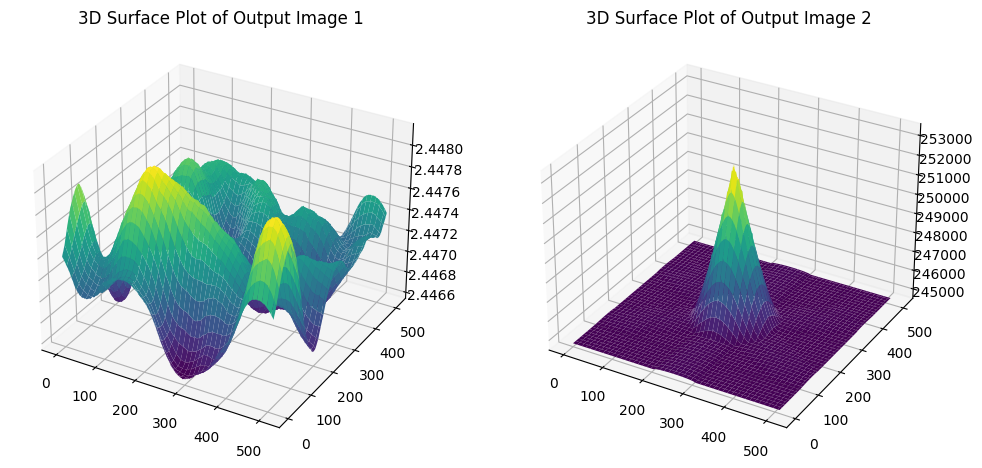

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D
import skimage.draw

# ... (same as before)

# Define the function to calculate the diffraction pattern
def diffraction_pattern(num_vanes, image_size):
    # Initialize the wavefront
    wavefront = np.ones(image_size)

    # Define the radius of the aperture, the secondary, and the vane thickness
    radius = image_size[0] // 2
    secondary_radius = int(0.2 * radius)
    vane_thickness = int(0.01 * radius)

    # Create the secondary
    y,x = np.ogrid[-radius:radius, -radius:radius]
    mask = x*x + y*y <= secondary_radius*secondary_radius
    wavefront[mask] = 0

    # Define the vane geometry
    vane_geometry = [((int(radius * np.cos(theta)), int(radius * np.sin(theta))), (0, 0)) for theta in np.linspace(0, 2*np.pi, num_vanes, endpoint=False)]

    # For each vane, calculate the diffraction pattern
    for vane in vane_geometry:
        rr, cc = skimage.draw.line(vane[0][0]+radius, vane[0][1]+radius, vane[1][0]+radius, vane[1][1]+radius)
        valid = (rr >= 0) & (rr < image_size[0]) & (cc >= 0) & (cc < image_size[1])
        wavefront[rr[valid], cc[valid]] = 0

    # Calculate the far-field diffraction pattern using Fourier transform
    diffraction_pattern = np.abs(np.fft.fft2(wavefront))**2

    return wavefront, diffraction_pattern

# Define the function to generate a synthetic star field image
def create_synthetic_image(image_size, num_stars):
    # Initialize the image
    image = np.zeros(image_size)

    # Generate random star positions
    star_positions = [tuple(pos) for pos in np.random.randint(0, image_size[0], size=(num_stars, 2))]

    # Set the star positions to white
    for star in star_positions:
        image[star] = 1

    return image

# Define the number of vanes
num_vanes = 3

# Define the image size
image_size = (512, 512)

# Calculate the diffraction pattern
wavefront, diffraction_pattern = diffraction_pattern(num_vanes, image_size)

# Create a synthetic star field image
image = create_synthetic_image(image_size, 1000)

# Apply the diffraction pattern to the image
convolved_image = np.fft.ifft2(np.fft.fft2(image) * diffraction_pattern).real

# Create a synthetic image with one large bright star in the center
image2 = np.zeros(image_size)
image2[image_size[0]//2, image_size[1]//2] = 1

# Apply the diffraction pattern to the second image
convolved_image2 = np.fft.ifft2(np.fft.fft2(image2) * diffraction_pattern).real


# Display the resulting images
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs[0, 0].imshow(wavefront, cmap='gray')
axs[0, 0].set_title('Aperture with Secondary and Vanes')
axs[0, 1].imshow(image, cmap='gray')
axs[0, 1].set_title('Input Image 1')
axs[0, 2].imshow(convolved_image, norm=colors.LogNorm(), cmap='gray')
axs[0, 2].set_title('Output Image 1')
axs[1, 1].imshow(image2, cmap='gray')
axs[1, 1].set_title('Input Image 2')
axs[1, 2].imshow(convolved_image2, norm=colors.LogNorm(), cmap='gray')
axs[1, 2].set_title('Output Image 2')

# Create 3D surface plots of the output images
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121, projection='3d')
X = np.arange(0, image_size[0])
Y = np.arange(0, image_size[1])
X, Y = np.meshgrid(X, Y)
ax1.plot_surface(X, Y, convolved_image, cmap='viridis')
ax1.set_title('3D Surface Plot of Output Image 1')

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X, Y, convolved_image2, cmap='viridis')
ax2.set_title('3D Surface Plot of Output Image 2')

plt.show()
